<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
# Считываем данные исходной таблицы. Для дальнейшей работы используем копию таблицы, которую создаем в переменной hh_data.

hh_original_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')
hh_data = hh_original_data.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
# Выводим первые 5 строк таблицы. Видим, что данные не повреждены, однако сразу бросается в глаза неудобный формат данных в таблице.
# Столбцы содержат только строковые признаки, а многие столбцы и вовсе содержат в себе сразу несколько признаков.

hh_data.head()

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
# Изучив общую информацию о данных видим, что таблица имеет 12 столбцов типа  object, общее число записей 44744.
# В столбцах 'Опыт работы', 'Последнее/нынешнее место работы', 'Последняя/нынешняя должность' имеются пропуски.

hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [5]:
# Просмотр информации о столбцах показал, что большинство столбцов имеют запредельно высокое число 
# уникальных значений признака (более 30% от общего числа значений в столбце).

hh_data.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
# Напишем функцию education_update для пребразования значений столбца 'Образование и ВУЗ': 
# 1 - преобразуем строку в список слов, 2 - отбрасываем лишние слова начиная с 3-го слова, 
# 3 - если полученый список заканчивается словом 'образование', то отсекаем и его, 4 - объединяем список слов.

def education_update(education):
    education_list = education.split(' ')
    education_type = education_list[:2]
    if education_type[-1] == 'образование':
        education_type = ' '.join(education_type[:-1])
    else:
        education_type = ' '.join(education_type)
    return education_type

# Применяем функцию к столбцу 'Образование и ВУЗ' и заносим результат в новый признак 'Образование'. 

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education_update)

# Преобразуем новый столбец к типу данных category.

hh_data['Образование'] = hh_data['Образование'].astype('category')

In [7]:
# Удаляем из таблицы столбец 'Образование и ВУЗ'

hh_data = hh_data.drop('Образование и ВУЗ', axis=1)

#hh_data.info()

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Создаем в таблице новый признак 'Пол' путем приенения к исходному столбцу lambda-функции, которая берет 1-й символ из строки.
# Преобразуем новый столбец к типу данных category.

hh_data['Пол'] = hh_data['Пол, возраст'].apply(lambda x: x[0]).astype('category')

# Создаем в таблице новый признак 'Возраст' путем приенения к исходному столбцу lambda-функции, которая берет 10-12 символы 
# из строки и преобразует значение в int64.

hh_data['Возраст'] = hh_data['Пол, возраст'].apply(lambda x: int(x[11:14]))

In [9]:
# Удаляем из таблицы столбец 'Пол и возраст'

hh_data = hh_data.drop('Пол, возраст', axis=1)

#hh_data.info()

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [10]:
# Напишем функцию experience_update для пребразования значений столбца 'Опыт работы': 
# 1 - ставим условие для отработки пустых значений и значений с фразой 'Не указано' (возвращаем NaN), 
# 2 - добавляем списки ключевых слов и счетчик для подсчета опыта работы, 3 - преобразуем строку в список слов, 
# срезом отсекаем лишние слова, 4 - ставим условия для подсчета опыта работа по ключевым словам.

def experience_update(experience):
    if experience is np.nan or experience == 'Не указано':
        return np.nan
    
    year_list = ['год', 'года', 'лет']
    month_list = ['месяц', 'месяца', 'месяцев'] 
    total_experience = 0
    experience_list = experience.split(' ')[2:6]

    if experience_list[1] in year_list and experience_list[3] in month_list:
        total_experience = int(experience_list[0])*12 + int(experience_list[2])
    elif experience_list[1] in year_list and experience_list[3] not in month_list:
        total_experience = int(experience_list[0])*12
    elif experience_list[1] in month_list:
        total_experience = int(experience_list[0])
    return total_experience

# Применяем функцию к столбцу 'Опыт работы' и заносим результат в новый признак 'Опыт работы (месяцы)'. 

hh_data['Опыт работы (месяцы)'] = hh_data['Опыт работы'].apply(experience_update)

In [11]:
# Удаляем из таблицы столбец 'Опыт работы'

hh_data = hh_data.drop('Опыт работы', axis=1)

#hh_data.info()

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [12]:
# Напишем функцию residence_update для выделения типа города из столбца 'Город, переезд, командировки': 
# 1 - преобразуем строку в список слов, берем из него первый элемент, 2 - ставим условия для разбивки возможных значений
# на 4 категории (Москва, Санкт-Петербург, город-миллионник, другие).

def residence_update(data_string):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 
                      'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    residence = data_string.split(' ')[0]
    if residence == 'Москва':
        return 'Москва'
    elif residence == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif residence in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

# Напишем функцию relocation_update для выделения из столбца 'Город, переезд, командировки' готовности к переезду: 
# 1 - задаем стоп-лист фраз, которые говорят о неготовности к переезду, 2 - ставим условие для разбивки возможных значений
# на True или False.

def relocation_update(data_string):
    stop_list = ['не готов к переезду', 'не готова к переезду']
    if stop_list[0] in data_string or stop_list[1] in data_string:
        return False
    else:
        return True

# Напишем функцию bussines_trip_update для выделения из столбца 'Город, переезд, командировки' готовности к коммандировкам: 
# 1 - задаем стоп-лист фраз, которые говорят о неготовности к командировкам, 2 - ставим условие для разбивки возможных значений
# на True или False (также учитывает вариант, если про командировки в анкете указано не было).

def bussines_trip_update(data_string):
    stop_list = ['не готов к командировкам', 'не готова к командировкам']
    if stop_list[0] in data_string or stop_list[1] in data_string or 'командировка' not in data_string:        
        return False
    else:
        return True

# C помощью данных функций создаем новые признаки в таблице: 'Город', 'Готовность к переезду', 'Готовность к командировкам'.
# Cтолбец 'Город' преобразуем к типу данных category.

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(residence_update)
hh_data['Город'] = hh_data['Город'].astype('category')
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(relocation_update)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(bussines_trip_update)

In [13]:
# Удаляем из таблицы столбец 'Опыт работы'

hh_data = hh_data.drop('Город, переезд, командировки', axis=1)

#hh_data.info()

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [14]:
# Создаем список с возможными типими занятости. Циклом проходимся по списку, создаем новые столбцы таблицы 
# c соответсвующими названиями и заполняем их значениями True или False.

employment_list = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for value in employment_list:
    hh_data['Занятость: ' + value] = hh_data['Занятость'].apply(lambda x: value in x)

# Создаем список с возможными типими графика работы. Циклом проходимся по списку, создаем новые столбцы таблицы 
# c соответсвующими названиями и заполняем их значениями True или False.

shedule_list = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for value in shedule_list:
    hh_data['График: ' + value] = hh_data['График'].apply(lambda x: value in x)

In [15]:
# Удаляем из таблицы столбцы 'Занятость', 'График'.

hh_data = hh_data.drop(['Занятость', 'График'], axis=1)

#hh_data.info()

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [16]:
# Разбиваем признак 'ЗП' и выделяем из него временные признаки 'salary' (размер ЗП) и 'currency' (указанная валюта).

hh_data[['salary', 'currency']] = hh_data['ЗП'].apply(lambda x: x.split(' ')).apply(pd.Series)
hh_data['salary'] = hh_data['salary'].astype('int')

# Из признака 'salary' выделяем список уникальных значений - список указанных в таблице валют.
# Добавляем второй список из тех же валют в ISO-кодировке.

data_currency_list = list(hh_data['currency'].unique())
iso_currency_list = ['RUB', 'BYN', 'KZT', 'EUR', 'USD', 'UAH', 'UZS', 'KGS', 'AZN']

# Напишем функцию edit_currency для преобразования указанных в таблице валют в ISO-кодировку. Применим ее к столбцу 'currency'.

def edit_currency(currency):
    for i, value in enumerate(data_currency_list):
        if value == currency:
            new_currency_code = iso_currency_list[i]
            return new_currency_code
                
hh_data['currency'] = hh_data['currency'].apply(edit_currency)

# Создаем временный признак 'date' в котором преобразуем дату из столбца 'Обновление резюме' 
# в тип данных datetime64[ns] (оставляем только год, месяц, день).

hh_data['date'] = pd.to_datetime(pd.to_datetime(hh_data['Обновление резюме']).dt.date)

# В переменную exchange подгружаем таблицу с данными о курсах валют. Удаляем из нее неинформативные признаки.
# Преобразуем дату в столбце 'date' в тип данных datetime64[ns].

exchange = pd.read_csv('data/ExchangeRates.csv', sep=',')
exchange_crop = exchange.drop(['per', 'time', 'vol'], axis=1)
exchange_crop['date'] = pd.to_datetime(exchange_crop['date'], dayfirst=True)

# Объединяем рабочую таблицу с таблицей курсов валют по признакам 'date', 'currency'.
# Признаки 'close' и 'proportion' имеют пропуски в тех строках, где указанная валюта рубль. Заполним пропуски значением 1.
# Создаем новый признак 'ЗП (в рублях)', значения которого рассчитываем по формуле:
# Размер зарплаты (salary) * Курс валюты (close) / Пропроция (proportion).

hh_data_merged = hh_data.merge(exchange_crop, on=['date', 'currency'], how='left')
hh_data_merged['close'] = hh_data_merged['close'].fillna(1)
hh_data_merged['proportion'] = hh_data_merged['proportion'].fillna(1)
hh_data_merged['ЗП (в рублях)'] = hh_data_merged['salary'] * hh_data_merged['close'] / hh_data_merged['proportion']


In [17]:
# Удаляем из таблицы столбцы 'ЗП', 'salary', 'currency', 'date', 'close', 'proportion'.

hh_data_merged = hh_data_merged.drop(['ЗП', 'salary', 'currency', 'date', 'close', 'proportion'], axis=1)
hh_data = hh_data_merged

# hh_data.info()

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [18]:
fig = px.histogram(
    data_frame=hh_data,
    x='Возраст',
    height=400,
    width=1000,
    title='Гистограмма распределения возраста соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/01_1_age_histogram.html')

fig = px.box(
    data_frame=hh_data,
    x='Возраст',
    height=400,
    width=1000,
    title='Коробчатая диаграмма распределения возраста соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/01_2_age_box.html')

Анализ распределения возраста соискателей показал:
* в таблице представлены резюме соискателей возрастом **от 14 до 100 лет** (последнее значение явный выброс);
* большнство резюме поданы от соискателей возрастом **от 22 до 35 лет**;
* мода распределения составляет **30 лет**, медиана - **31 год**.

**Гистограмма распределения** возрастов сильно вытянута вправо и имеет длинный хвост с единичными резюме соискателей возрастом от 60 до 77 лет. 

*Есть предположение, что люди преклонного возраста редко размещают резюме в интернете, и часть этих резюме может быть выбросами. Однако, чтобы делать выводы, нужно проанализировать категорию этих соискателей детальнее.*

**Коробчатая диаграмма** показывает примерно ту же картину, при этом правая граница размаха стоит на возрасте 50 лет, и резюме более старшего возраста уже находятся в зоне аномалий.

*С другой стороны, резюме соискателей, близкие к минимальному возрасту (от 14 до 18 лет) аномалиями считать нельзя, так как молодые люди, подростки вполне могут быть заинтересованными в поиске какой-то подработки.*

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [19]:
fig = px.histogram(
    data_frame=hh_data,
    x='Опыт работы (месяцы)',
    height=400,
    width=1000,
    title='Гистограмма распределения опыта работы (в месяцах) соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/02_1_experience_histogram.html')

fig = px.box(
    data_frame=hh_data,
    x='Опыт работы (месяцы)',
    height=400,
    width=1000,
    title='Коробчатая диаграмма распределения опыта работы (в месяцах) соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/02_2_experience_box.html')

Анализ распределения опыта работы соискателей показал:
* в таблице представлены резюме соискателей с опытом работы **от 1 до 1188 месяцев** (последнее значение явный выброс, ~99 лет);
* большнство резюме поданы от соискателей с опытом работы **от 6 до 154 месяцев** (от полугода до 13 лет);
* мода распределения составляет **81 месяц** (6 лет 9 месяцев), медиана - **100 месяцев** (8 лет 4 месяца).

**Гистограмма распределения** опыта работы показыват резкий рост от начала оси и сильно вытянута вправо, имеет длинный хвост с единичными резюме соискателей с опытом работы от 396 месяцев (более 33 лет). Такое вполне возможно, и без дополнительного анализа считать эти значения аномалией было бы преждевременным. Явным выбросом здесь можно считать лишь последнее значение, где опыт работы составляет более 99 лет.

*Также можно отметить, что порядка 1,5 тысяч соискателей имеют опыт работы менее 1 года.*

**Коробчатая диаграмма** показывает примерно ту же картину, при этом правая граница размаха стоит на опыте работы 300 месяцев (25 лет), и резюме более опытных соискателей уже находятся в зоне аномалий.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [20]:
fig = px.histogram(
    data_frame=hh_data,
    x='ЗП (в рублях)',
    height=400,
    width=1000,
    title='Гистограмма распределения желаемой зарплаты (в рублях) соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/03_1_salary_histogram.html')

fig = px.box(
    data_frame=hh_data,
    x='ЗП (в рублях)',
    height=400,
    width=1000,
    title='Коробчатая диаграмма распределения желаемой зарплаты (в рублях) соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/03_2_salary_box.html')

На данном этапе анализа графики распределения желаемой заработной платы практически **нечитаемы и неинформативны**."Схлопнутый" вид графика получается из-за наличия в данных нескольких выбросов в десятки раз превосходящие нормальные значения признака (5 значений от 1,75 млн до 24,3 млн рублей).

**Конструктивный анализ данного показателя будет возможен только после очистки данных от выбросов.**

Тем не менее, получить основные статистические данные по признаку ЗП (в рублях) можно (с учетом сильных выбросов показатели могут быть искажены):
* в таблице представлены резюме соискателей с желаемой заработной платой **от 1 до 24 304 876 рублей**;
* большнство резюме поданы от соискателей, желающих зарабатывать **от 37 000 до 95 000 рублей**;
* мода распределения составляет **50 000 рублей**, медиана - **59 000 рублей**.

*Резюме, в которых желаемую заработную плату указали несоразмрно малой (например, 1 рубль), тоже можно считать выбросами.*


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [21]:
salary_from_education = hh_data[hh_data['ЗП (в рублях)'] < 1000000].groupby('Образование')['ЗП (в рублях)'].median().sort_values()

fig = px.bar(
    data_frame=salary_from_education,
    height=400,
    width=1000,
    title='Столбчатая диаграмма зависимости желаемой заработной платы от образования соискателей на HeadHunter.ru'
)
fig.show()
fig.write_html('plotly/04_1_salary_from_education_bar.html')

На столбчатой диаграмме видна **прямая зависимость** желаемой заработной платы от уровня образования соискателя - чем выше уровень образования, тем на большую заработную плату рассчитывает человек.

Стоит отметить что медианная заработная плата, которую указывают соискатели со **средним и средним специальным образованием**, совпадает и составляет 40 000 рублей.

Соискатели с **высшим образованием** хотят получать за свою работу больше всего - медианная заработная плата для них 60 000 рублей.

Данная зависимость не случайна, ведь чем выше уровень образования, тем большим числом навыков и знаний в предметной области обладает потенциальный кандидат на должность, а соответсвенно, чем выше квалификация работника, тем больше работодатель готов ему платить.
Признак уровня образования важен для оценки желаемой заработной платы соискателя.

*Нельзя упускать из виду тот факт, что человек может иметь образование не по той специальности, по которой ищет работу. В данном случае человек без профильного образования по специальности врятли сможет претендовать на высокую зарплату, даже если покажет диплом о высшем образовании в другой сфере. 
Например, соискатель, у которого в образовании указано "Балтийская государственная академия рыбопромыслового флота, Калининград судоводительский, Организация и безопасность движения" врядли сможет получить работу с достойной зарплатой в IT-отрасли, если у него нет других квалификаций или знаний в данной сфере.*

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [22]:
salary_from_city = hh_data[hh_data['ЗП (в рублях)'] < 1000000].groupby('Город')['ЗП (в рублях)'].median().sort_values()

fig = px.bar(
    data_frame=salary_from_city,
    height=400,
    width=1000,
    title='Столбчатая диаграмма зависимости желаемой заработной платы от города соискателей на HeadHunter.ru'
)
fig.show()
fig.write_html('plotly/05_1_salary_from_city_bar.html')

fig = px.box(
    data_frame=hh_data[hh_data['ЗП (в рублях)'] < 1000000],
    x='ЗП (в рублях)',
    y='Город',
    height=500,
    width=1000,
    title='Коробчатая диаграмма зависимости желаемой заработной платы от города соискателей на HeadHunter.ru',
    )
fig.show()
fig.write_html('plotly/05_2_salary_from_city_box.html')

Как и можно было предположить логически, уровень желаемой зароботной платы зависит от типа города, в котором живет соискатель. 

Уровень жизни и цены в Москве и Санкт-Петербурге выше, чем в других городах России, поэтому соискатели из этих городов ожидают и соответсвующего уровня зарплаты. 

Вместе с тем, соискатели из "городов-миллонников" и из других городов России имеют одинаковые ожидания от своей заработной платы.

В порядке убывания ожидания от заработной платы по городам можно разделить на 3 группы:
1. Самые высокие ожидания от зарплаты у жителей **столицы**: медиана составляет 85 000 рублей, 25-я квантиль - 60 000 рублей, 75-я квантиль - 150 000 рублей, границы размаха от 1 до 285 000 рублей.
2. На втором месте жители **Санкт-Петербурга**: медиана здесь составляет 60 000 рублей, 25-я квантиль - 44 000 рублей, 75-я квантиль - 85 000 рублей, границы размаха от 1 до 145 000 рублей.
3. Третье место делят жители **"городов-миллонников"** и **других городов** России: медиана составляет 40 000 рублей, 25-я квантиль - 30 000 рублей, 75-я квантиль - 60 000 рублей, границы размаха от 1 до 105 000 рублей.

Таким образом, признак места жительства является важным для оценки желаемой заработной платы соискателя.

*На коробчатой диаграмме по каждому из типов городов мы видим множество значений правее правой границы размаха. Даже с учетом того, что самые явные выбросы мы исключили при построении графиков, крайние правые значения выглядят как аномалии. Значения зарплаты более 300 000 рублей (и более 500 000 рублей для Москвы) стоит проанализировать детальнее в срезе других признаков таблицы.*


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [23]:
salary_from_remove = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (в рублях)'].median()
salary_from_remove

fig = px.bar(
    data_frame=salary_from_remove,
    x='Готовность к переезду',
    y='ЗП (в рублях)',
    color='Готовность к командировкам',
    barmode='group',
    height=500,
    width=1000,
    title='Столбчатая диаграмма зависимости желаемой заработной платы от готовности к переезду и командировкам',
    )
fig.show()
fig.write_html('plotly/06_1_salary_from_remove_bar.html')

Диаграмма показывает, что готовность людей к переезду и командировкам влияет на размер желаемой заработной платы, указываемой ими в резюме:
* не мобильные соискатели (не готовые к командировкам и переезду) имеют **самые низкие ожидания от зарплаты** (медиана - 40 000 рублей);
* **самую большую зарплату** ищут люди, готовые и на командировки и на переезд (медиана около 66 000 рублей).

Если сравнить данные признаки в другом разрезе, то прослеживается следующая интересная тенденция:
* готовность людей к переезду без командировок повышает ожидаемую медианную зарплату на 25%, а готовность к командировкам без переезда - на 50%;
* а вот готовность к переезду для людей готовых к командировкам практически не влияет на ожидаемую медианную зарплату (разница менее 10%).

Из этого можно сделать вывод, что оба признака влияют на ожидаемую заработную плату, но по разному. 

Рост медианной зарплаты в связи с **готовностью переезда** можно объяснить издержками на сам переезд и обустройство человека на новом месте. А также желанием получать в новом городе большую зарплату, чем получал до этого. При этом такой человек скорее всего уже хочет сменить свое место жительства.

**Готовность к командировкам** предполагает дополнительную нагрузку и стрессы: частые переезды, смену привычной обстановки, отрыв от дома и семьи, общение с новыми людьми, оперативное решение каких-либо вопросов. Готовность к такому режиму работы влияет на ожидаемую зарплату сильнее, чем простой переезд.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

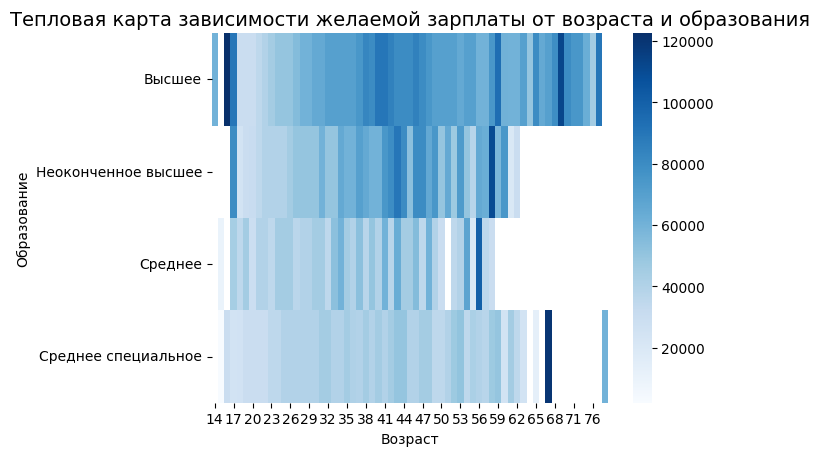

In [24]:
salary_from_age_education = hh_data.pivot_table(values='ЗП (в рублях)', index='Образование', columns='Возраст', aggfunc='median')

heatmap = sns.heatmap(data=salary_from_age_education, cmap='Blues')
heatmap.set_title('Тепловая карта зависимости желаемой зарплаты от возраста и образования', fontsize=14);

На тепловой карте видно, что максимальные ожидания от размера заработной платы у людей с **высшим и неоконченным высшим образованием**. Причем только в данных категориях интенсивность цвета растет с увеличением возраста соискателя (чем старше человек, тем большую зарплату он хочет получать).

*Стоит отметить, что только среди соискателей с высшем образованием есть люди старшей возрастной группы (старше 62 лет).*

Самые низкие ожидания от зарплаты у людей со **средним специальным образованием** - цветовой диапазон здесь соответствует зарплатам от 20 до 50 тысяч рублей.

Бросаются в глаза и некоторые аномалии в распределении данных:
* группа соискателей возрастом до 18 лет, якобы имеющие в свои годы высшее образование и, к тому же, указывающие в резюме аномально высокие зарплаты;
* люди старшей возрастной группы (от 65 до 77 лет), желающие получать более 80 000 рублей - в силу преклонного возраста есть некоторые сомнения соответствия их квалификации таким высокооплачиваемым должностям.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [25]:
fig = px.scatter(
    data_frame=hh_data,
    x='Возраст',
    y=hh_data['Опыт работы (месяцы)'].apply(lambda x: x/12),
    height=800,
    width=800,
    labels={'y':'Опыт работы (лет)'},
    title='Диаграмма рассеяния взаимосвязи опыта работы (в годах) от возраста соискателей',
    )
fig.add_shape(
    type="line", 
    x0=0, 
    y0=0, 
    x1=100, 
    y1=100, 
    line=dict(color="Red", width=2), 
    xref='x', 
    yref='y'
    )
fig.add_shape(
    type="line", 
    x0=14, 
    y0=0, 
    x1=100, 
    y1=86, 
    line=dict(color="Gray", width=2), 
    xref='x', 
    yref='y'
    )
fig.show()
fig.write_html('plotly/08_1_experience_from_age_scatter.html')

In [26]:
# В дополнение к графику посчитаем, сколько людей имеют неадекватный к их возрасту опыт работы (судя по резюме они начали 
# работать, когда им еще не было 14 лет).

check_experience = hh_data['Возраст'] - hh_data['Опыт работы (месяцы)'].apply(lambda x: x/12)
check_experience[check_experience < 14].shape[0]

73

На диаграмме рассеяния хорошо прослеживается прямая зависимость между возрастом соискателя и его опытом работы.

Но тут же видны нескоторые аномалии:
1. Значения выше красной линии - это соискатели, у которых в резюме указан опыт работы больше их возраста (7 резюме).
2. Значения выше серой линии - это соискатели, у которых в резюме указан опыт работы менее, чем на 14 лет меньше их возраста (73 резюме). То есть, судя по резюме, работать эти люди начали, когда им еще не было 14 лет. Это либо "вундеркинды" либо дополнительная порция выбросов. Но лучше проверить эту категорию соискателей отдельно, возможно стоит ослабить границы линии (например, до 10 лет).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


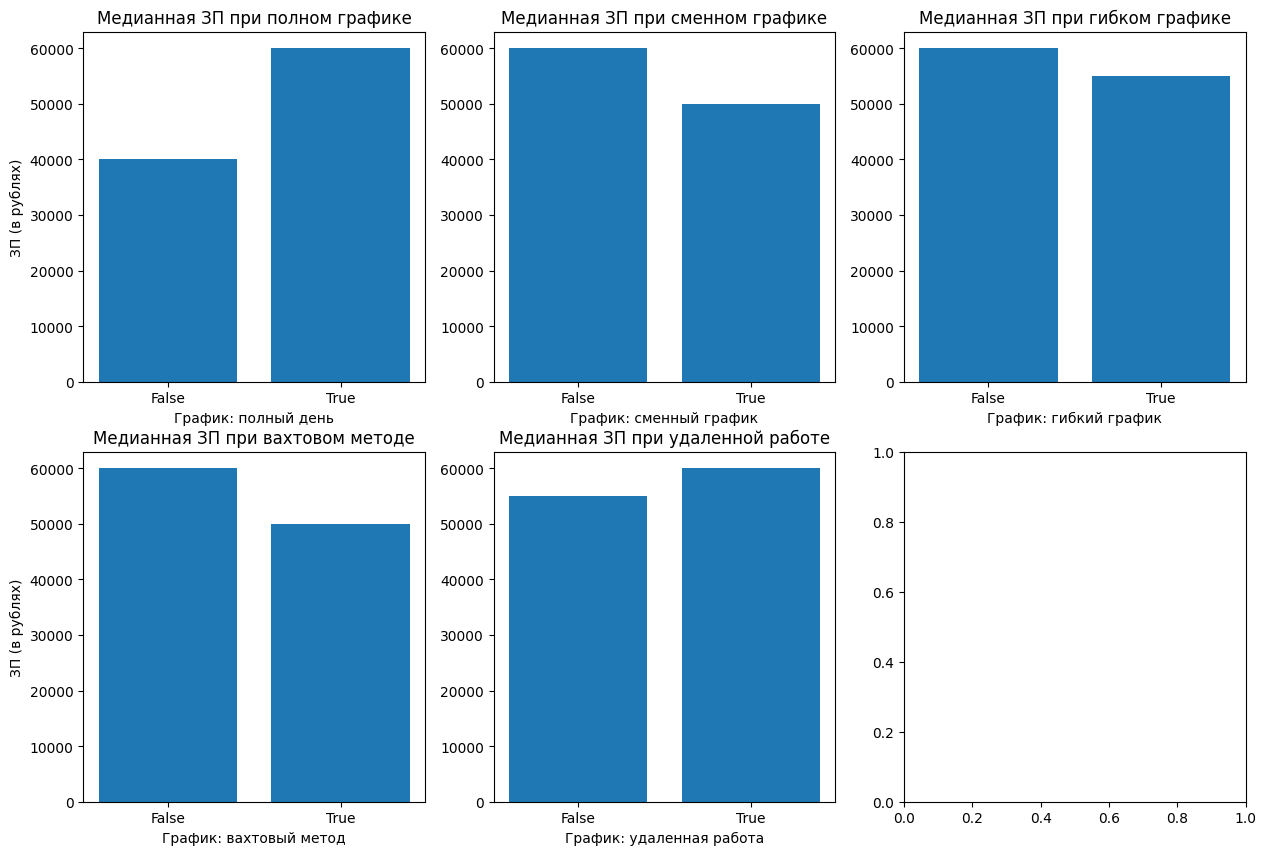

In [27]:
# Построим столбчатые диаграммы для исследования взаимосвязи между типами графиков работы и медианной зарплатой,
# указываемой соискателями в своих резюме.

schedule_full = hh_data.groupby('График: полный день')['ЗП (в рублях)'].median()
schedule_change = hh_data.groupby('График: сменный график')['ЗП (в рублях)'].median()
schedule_flexible = hh_data.groupby('График: гибкий график')['ЗП (в рублях)'].median()
schedule_duty = hh_data.groupby('График: вахтовый метод')['ЗП (в рублях)'].median()
schedule_online = hh_data.groupby('График: удаленная работа')['ЗП (в рублях)'].median()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0][0].bar(
    x=schedule_full.index,
    height=schedule_full,
    tick_label=['False', 'True']
    )
axes[0][0].set_xlabel('График: полный день')
axes[0][0].set_ylabel('ЗП (в рублях)')
axes[0][0].set_title('Медианная ЗП при полном графике')

axes[0][1].bar(
    x=schedule_change.index,
    height=schedule_change,
    tick_label=['False', 'True']
    )
axes[0][1].set_xlabel('График: сменный график')
axes[0][1].set_title('Медианная ЗП при сменном графике')

axes[0][2].bar(
    x=schedule_flexible.index,
    height=schedule_flexible,
    tick_label=['False', 'True']
    )
axes[0][2].set_xlabel('График: гибкий график')
axes[0][2].set_title('Медианная ЗП при гибком графике')

axes[1][0].bar(
    x=schedule_duty.index,
    height=schedule_duty,
    tick_label=['False', 'True']
    )
axes[1][0].set_xlabel('График: вахтовый метод')
axes[1][0].set_ylabel('ЗП (в рублях)')
axes[1][0].set_title('Медианная ЗП при вахтовом методе')

axes[1][1].bar(
    x=schedule_online.index,
    height=schedule_online,
    tick_label=['False', 'True']
    )
axes[1][1].set_xlabel('График: удаленная работа')
axes[1][1].set_title('Медианная ЗП при удаленной работе');

Столбчатые диаграммы показывают, что имеется определенная зависимость ожидаемой заработной платы от выбранного графика работы:
* наибольшую зарплату соискатели хотели бы получать при **полном графике** (60 000 рублей) или на **удаленной работе** (60 000 рублей);
* у соискателей, предпочитающих гибкий график работы, медианное значение ожидаемой зарплаты 55 000 рублей;
* наименьшие ожидания по зарплате у соискателей, ищущих **вахтовый или сменный график** работы (50 000 рублей).



In [28]:
# Построим коробчатую диаграмму для исследования зависимости медианной зарплатой от пола соискателей.

fig = px.box(
    data_frame=hh_data[hh_data['ЗП (в рублях)'] < 1000000],
    x='ЗП (в рублях)',
    y='Пол',
    height=500,
    width=1000,
    title='Коробчатая диаграмма зависимости желаемой заработной платы от пола соискателя',
    )
fig.show()
fig.write_html('plotly/10_1_salary_from_gender_box.html')

Из диаграммы видим, что мужчины ищут работу с более высокой зарплатой, чем женщины.

Для **мужчин**: медиана по зарплате составляет 60 000 рублей, 25-я квантиль - 40 000 рублей, 75-я квантиль - 100 000 рублей, границы размаха от 1 до 190 000 рублей.

Для **женщин**: медиана по зарплате составляет 48 000 рублей, 25-я квантиль - 30 000 рублей, 75-я квантиль - 70 000 рублей, границы размаха от 25 до 130 000 рублей.

Таким образом, пол в резюме также является важным критерием для оценки желаемой заработной платы соискателя. 

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [29]:
# Удаляем полные дубли методом drop_duplicates.

hh_data = hh_data.drop_duplicates()

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [30]:
# Выведем список столбцов, в которых число пропусков больше 0.
 
null = hh_data.isnull().sum()
null_cols = null[null > 0].sort_values(ascending=False)
null_cols

Опыт работы (месяцы)               168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [31]:
# Для заполнения пропусков в признаке 'Опыт работы (месяцы)' создаем словарь (имя столбца: медианное значение его значений).

values = {'Опыт работы (месяцы)': hh_data['Опыт работы (месяцы)'].median()}
hh_data = hh_data.fillna(values)

# Удаляем записи с оставшимися пропусками в признаках 'Последняя/нынешняя должность', 'Последнее/нынешнее место работы'.

hh_data = hh_data.dropna(how='any', axis=0)

# hh_data.isnull().sum()

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [32]:
# Чтобы избавиться от выбросов в признаке 'ЗП (в рублях)' перезапишем таблицу, применив фильтр.

hh_data = hh_data[(hh_data['ЗП (в рублях)'] < 1000000)&(hh_data['ЗП (в рублях)'] >= 1000)]

#hh_data.info()

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [33]:
# Чтобы избавиться от выбросов, когда опыт работы превышает возраст соискателя, перезапишем таблицу, применив фильтр.

hh_data = hh_data[(hh_data['Возраст'] - hh_data['Опыт работы (месяцы)']/12) > 0]

#hh_data.info()

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

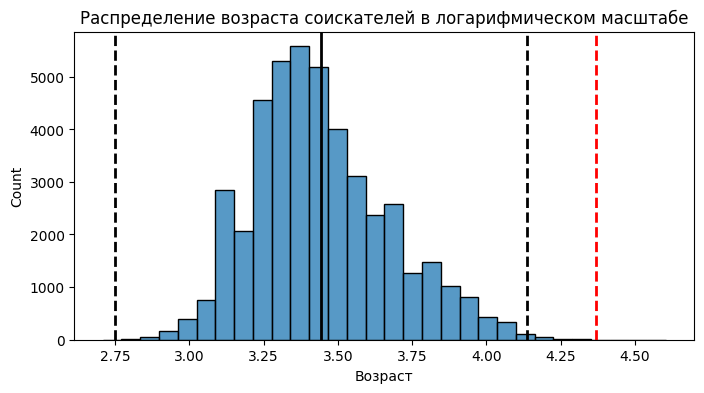

In [34]:
# Построим гисторамму распределения возраста соискателей в логарифмическом масштабе. 
# На графике видно, что распределение похоже на нормальное. При этом линия среднего значения смещена относительно 
# моды вправо, то есть распределение имеет небольшую ассиметрию в правую сторону.
# Правая линия сигмы (+3) отсекает часть данных, которые могут и не являться выбросами. Чтобы избежать этого, 
# сделаем поправку вправо и добавим еще одну линию сигмы - красную (+4).

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean() + 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() - 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean() + 4 *log_age.std(), color='r', ls='--', lw=2)
histplot.set_title('Распределение возраста соискателей в логарифмическом масштабе');

In [35]:
# Для поиска выбросов по методу Z-отклонений воспользуемся функцией find_outliers_z_score, которую мы разработали 
# ранее. Перезапишем таблицу, сохранив в ней только очищенные даннные. Выведем на экран строки с найденными выбросами.

from outliers_lib.find_outliers import find_outliers_z_score

outliers, cleaned = find_outliers_z_score(hh_data, 'Возраст', right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

hh_data = cleaned

outliers.head()

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44484


Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами  06.04.2019 09:13  Не указано   
32950                  Тестировщик ПО  09.04.2019 16:02  Не указано   
33654            Frontend-разработчик  19.04.2019 23:27  Не указано   

               Образование Пол  Возраст  Опыт работы (месяцы)  \
31137              Среднее   М       15                   2.0   
32950  Среднее специальное   М       15                   3.0   
33654  Среднее специальное   М      100                  30.0   

                 Город  ...  Занятость: частичная занятость  \
31137  Санкт-Петербург  ...                            True   
32950           другие  ...                           False   
33654  Санкт-Петербург  ...                            True   

       Занятость: проектная работа  Занятость: волонтерство  \
31137                        False                    False   
32950                        False                    False   
33654                         True                    False   

       Занятость: стажировка  График: полный день  График: сменный график  \
31137                  False                False                    True   
32950                  False                 True                   False   
33654                   True                 True                   False   

       График: гибкий график  График: удаленная работа  \
31137                   True                      True   
32950                  False                     False   
33654                   True                      True   

       График: вахтовый метод  ЗП (в рублях)  
31137                   False        10000.0  
32950                   False         2000.0  
33654                   False        60000.0  

[3 rows x 23 columns]

Мы воспользовались методом Z-отклонений, чтобы очистить данные от резюме людей чересчур преклонного возраста для поиска работы. В результате же мы получили лишь три выброса:
* два из них - это соискатели возраста **15 лет** (хотя их резюме и сомнительны (особенно последнее место работы), но в целом это могут быть реальные анкеты соискателей подростков в поисках подработки);
* 3-й выброс - это резюме соискателя возрастом **100 лет** (эту аномалию мы уже видели при построении графиков зависимостей признаков, и могли бы удалить это значение вручную).

*Казалось бы, что метод Z-отклонений не сработал, но скорее всего требуемые в задаче настройки слишком мягкие, и если бы мы подобрали правильную левую и правую границу интервала сигм, то отловили бы как раз те рюземе, которые искажают реальную картину данных.*